# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [3]:
import numpy as np
from scipy.ndimage.filters import convolve
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
%matplotlib inline

### Reading the Mosaic Image

In [269]:

def read_image(IMG_NAME):
    IMG_NAME = r'images/'+ IMG_NAME
    print(IMG_NAME)
    img = cv2.imread(IMG_NAME,0)
    return img
def read_source(IMG_NAME):
    IMG_NAME = r'images/'+ IMG_NAME
    print("reading from origin image: " + IMG_NAME)
    img = cv2.imread(IMG_NAME,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def save_image(img,name):
    cv2.imwrite("reconstructed_"+name+".bmp",img)
    print(name+"saved!")

def show_image(img):
    plt.imshow(img)
    plt.show()
    
def second_show(img):
    plt.imshow((img * 255).astype(np.uint8))
    plt.show()


In [270]:
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_NAME)# YOUR CODE HERE

images/crayons.bmp


In [271]:
print(mosaic_img.shape)
show_image(mosaic_img)

(480, 600)


### Linear Interpolation

In [272]:
### HINT : You might want to use filters

In [273]:
# kernel = np.array([[[1,0,1],[0,0,0],[1,0,1]],[[0,1,0],[1,0,1],[0,1,0]],[[1,0,1],[0,0,0],[1,0,1]]])/4
kernel_G = np.asarray(
    [[0, 1, 0],
     [1, 4, 1],
     [0, 1, 0]]) / 4  

kernel_RB = np.asarray(
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]]) / 4 
# kernel_green = np.array([[0,1,0],[1,0,1],[0,1,0]])
# kernel_blue = np.array([[1,0,1],[0,0,0],[1,0,1]])

In [274]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [275]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [276]:
def get_solution_image(image):
    masks = dict((color, np.zeros(image.shape)) for color in 'RGB')
    masks['R'][0::2, 0::2] = 1
    masks['G'][0::2, 1::2] = 1
    masks['G'][1::2, 0::2] = 1
    masks['B'][1::2, 1::2] = 1
    
    for color in 'RGB':
        masks[color] = masks[color].astype(bool)

    R = convolve(image * masks['R'], kernel_RB, mode='constant', cval=0)
    G = convolve(image * masks['G'], kernel_G, mode='constant', cval=0)
    B = convolve(image * masks['B'], kernel_RB, mode='constant', cval=0)
    return np.stack([R, G, B],axis=2)

In [277]:
def compute_errors(soln_image, original_image):
    squre_diff = np.zeros((soln_image.shape[0], soln_image.shape[1]), dtype=np.float)
    soln_float = soln_image.astype(np.float64)
    origin_float = original_image.astype(np.float64)
    diff = np.square( np.absolute(np.subtract(soln_image,origin_float)) )
    diff = np.sum(diff, axis=2)
    
    pp_err = np.sum(diff)/diff.size
    max_err = diff.max()
    show_image(diff)
    # 
    # squre_diff = np.zeros((soln_image.shape[0], soln_image.shape[1]), dtype=np.float)
    # max_err = 0
    # for i in range(3):
    #     difference = np.absolute(soln_image[:, :, i], original_image[:, :, i]).astype(np.float)
    #     squre_diff += np.square(difference)
    #     
    # pp_err = np.sum(squre_diff)/total_size
    # max_err = squre_diff.max()
    # 
    # print(max_err)
    # squre_diff /= (squre_diff.max()/255.0)
    # show_image(squre_diff.astype(np.uint8))

    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    return pp_err, max_err

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

images/crayons.bmp


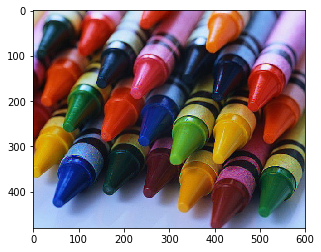

crayonssaved!
reading from origin image: images/crayons.jpg


In [278]:
mosaic_img = read_image('crayons.bmp')
soln_image = mosaic_img.copy()
soln_image = get_solution_image(mosaic_img)
show_image(soln_image)
save_image(soln_image, 'crayons')
original_image = read_source('crayons.jpg')
show_image(original_image)
# For sanity check display your solution image here
### YOUR CODE

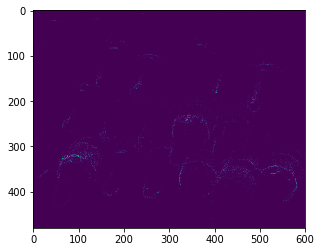

The average per-pixel error for crayons is: 204.0191736111111
The maximum per-pixel error for crayons is: 53633.0


In [204]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

images/iceberg.bmp


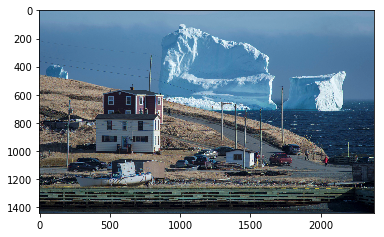

reading from origin image: images/iceberg.jpg


In [206]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
show_image(soln_image)
original_image = read_source('iceberg.jpg')
show_image(original_image)
# For sanity check display your solution image here
### YOUR CODE

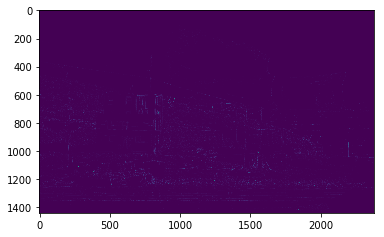

The average per-pixel error for iceberg is: 114.66698910812576
The maximum per-pixel error for iceberg is: 30553.0


In [207]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

images/tony.bmp


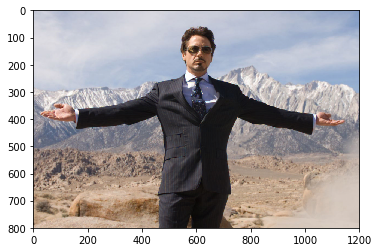

reading from origin image: images/tony.jpg


In [208]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
show_image(soln_image)
original_image = read_source('tony.jpg')
show_image(original_image)
# For sanity check display your solution image here
### YOUR CODE

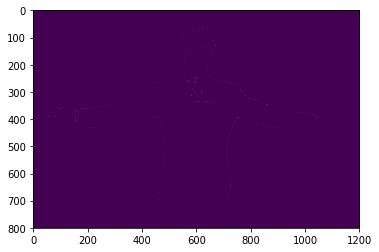

The average per-pixel error for tony is: 58.266522916666666
The maximum per-pixel error for tony is: 36973.0


In [209]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [210]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)
show_image(soln_image)
# Generate your solution image here and show it 

images/hope.bmp


### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [249]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    freeman_soln_image = get_solution_image(mosaic_img).astype(np.float64)
    R_sub_G = np.subtract(freeman_soln_image[:, :, 0], freeman_soln_image[:, :, 1])
    B_sub_G = np.subtract(freeman_soln_image[:, :, 2], freeman_soln_image[:, :, 1])
    
    # print(R_sub_G)
    
    median_R_G = scipy.signal.medfilt2d(R_sub_G)
    median_B_G = scipy.signal.medfilt2d(B_sub_G)
    # print(median_R_G)

    freeman_soln_image[:, :, 0] = median_R_G + freeman_soln_image[:, :, 1]
    freeman_soln_image[:, :, 2] = median_B_G + freeman_soln_image[:, :, 1]
    
   
    return freeman_soln_image.astype(np.uint8)

images/tony.bmp


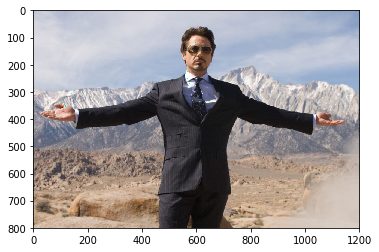

reading from origin image: images/tony.jpg


In [250]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
show_image(soln_image)
original_image = read_source('tony.jpg')
show_image(original_image)
# For sanity check display your solution image here
### YOUR CODE

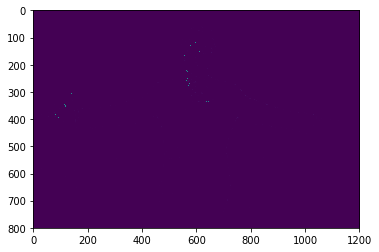

The average per-pixel error for tony is: 41.043455208333334
The maximum per-pixel error for tony is: 130050.0


In [251]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

images/iceberg.bmp


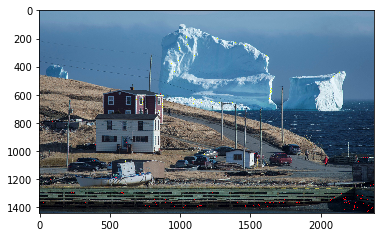

reading from origin image: images/iceberg.jpg


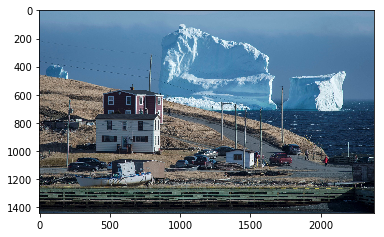

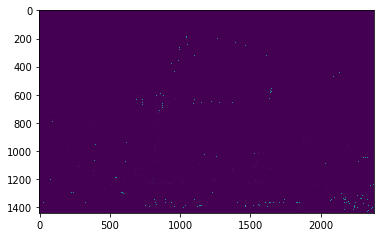

The average per-pixel error for tony is: 179.8695508559567
The maximum per-pixel error for tony is: 126517.0


In [253]:
### Feel free to play around with other images for Freeman's method above ###
mosaic_img = read_image('iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
show_image(soln_image)
original_image = read_source('iceberg.jpg')
show_image(original_image)
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

images/hope.bmp


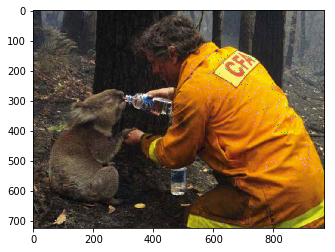

In [229]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
show_image(soln_image)
# Generate your solution image here and show it

### Mosaicing an Image

### Now lets take a step backwards and mosaic an image.

In [216]:
def get_mosaic_image(original_image):
    
    width, height, channel = original_image.shape
    mosaic_img = np.zeros((width, height), dtype=np.uint8)
    for i in range(width):
        for j in range(height):
            if i%2 == 0 and j%2 == 0:
                mosaic_img[i][j] = original_image[i][j][0]
            elif i%2 == 1 and j%2 == 1:
                mosaic_img[i][j] = original_image[i][j][2]
            else:
                mosaic_img[i][j] = original_image[i][j][1]
    
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    return mosaic_img

In [217]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

reading from origin image: images/overwatch.jpg
mosaic image:
(360, 432)


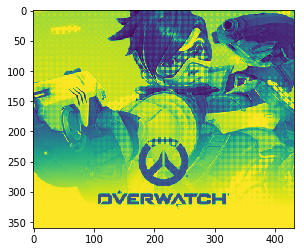

demosaic image


In [257]:
### YOUR CODE HERE ###

original_image = read_source('overwatch.jpg')
# show_image(original_image)

mosaic_img = get_mosaic_image(original_image)
print("mosaic image:")
print(mosaic_img.shape)
show_image(mosaic_img)


# given_mosaic = read_image("tony.bmp")
# print("given mosaic ")
# show_image(given_mosaic)

# print(np.subtract(mosaic_img, given_mosaic))

demosaic_image = get_freeman_solution_image(mosaic_img)
print("demosaic image")
show_image(demosaic_image)

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

reading from origin image: images/starcraft.jpg


mosaic image:
(750, 1200)


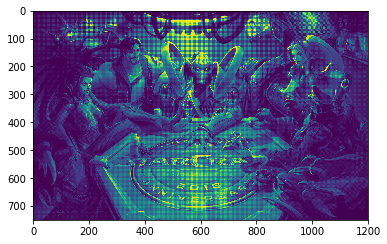

demosaic image


In [255]:
### YOUR CODE HERE ###

original_image = read_source('starcraft.jpg')
# show_image(original_image)

mosaic_img = get_mosaic_image(original_image)
print("mosaic image:")
print(mosaic_img.shape)
show_image(mosaic_img)


# given_mosaic = read_image("tony.bmp")
# print("given mosaic ")
# show_image(given_mosaic)

# print(np.subtract(mosaic_img, given_mosaic))

demosaic_image = get_freeman_solution_image(mosaic_img)
print("demosaic image")
show_image(demosaic_image)

### Bonus Points

reading from origin image: images/overwatch.jpg
mosaic image:
(360, 432)


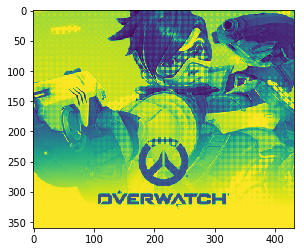

demosaic image


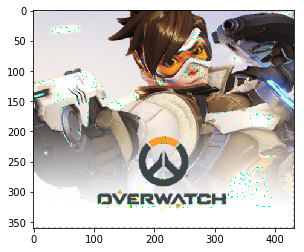

In [4]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####